# Introduction
The datasheet used here is scapped from  [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957 till to-date (Feb 2024)

# Installation and importing the Packages

In [ ]:
# Install iso3166 package for country codes
!pip install iso3166

In [ ]:
!pip install --upgrade plotly

In [10]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
import os

# Data Loading

In [12]:
df_data = pd.read_csv('all_mission_launches.csv')

# Preliminary Data Exploration
* What is the shape of df_data and how many rows and columns does it have?
* 
What a the names of the column?
* Are there any NaN values or duplicates?es?

In [13]:
# Dimensions of the data frame
df_data.shape

(6711, 8)

In [14]:
# Column names
df_data.columns

Index(['Unnamed: 0', 'Organisation', 'Location', 'Datetime', 'Details',
       'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [15]:
# Check for NaN values
df_data.isna().values.any()

True

In [19]:
df_data.duplicated().values.any()

False

# Data Cleaning

## Remove unnecessary columns and Nan values

In [20]:
# Remove the unnecessary columns and NaN values. There are no duplicates exists

In [21]:
df_data = df_data.drop(columns=['Unnamed: 0'])

In [27]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    6711 non-null   object 
 1   Location        6711 non-null   object 
 2   Datetime        6711 non-null   object 
 3   Details         6711 non-null   object 
 4   Rocket_Status   6711 non-null   object 
 5   Price           6711 non-null   float64
 6   Mission_Status  6711 non-null   object 
dtypes: float64(1), object(6)
memory usage: 367.1+ KB


In [24]:
# From data frame info, only Price column has NaN values. Instead of dropping rows with NaN values, fill them with 0.
# This will allow us to get other important statistics

In [26]:
df_data['Price'].fillna(0, inplace=True)

# Data Extraction
* Add two additional column named Year and Month. Year and Month can be extracted from Datetime column
* Add Country column and whereever required, change the country name to official country name
* Add an ISO column which has 3 letter code (alpha3 format) of country name

In [44]:
# Add Year column by extracting the year from Date
df_data['Year'] = df_data['Datetime'].str[12:16]

# Add Month column by extracting the month from Date
df_data['Month'] = df_data['Datetime'].str[4:7]

In [46]:
# Add a month number column. This will help with sorting of months
month_to_num = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

def get_month_nr(month):
  return month_to_num[month]

df_data['Month_Nr'] = df_data['Month'].apply(lambda x: get_month_nr(x))

In [33]:
# Extract the Country name from Location
df_data['Country'] = df_data['Location'].str.split(',').str[-1].str.strip()

In [34]:
# Check if country names are same as the official name 
df_data['Country'].unique()

array(['Russia', 'USA', 'China Coastal Waters', 'China', 'New Zealand',
       'Iran', 'Japan', 'India', 'Kazakhstan', 'South Korea',
       'North Korea', 'France', 'Israel', 'United Kingdom',
       'Pacific Missile Range Facility', 'Pacific Ocean',
       'Marshall Islands', 'Barents Sea', 'Brazil', 'Gran Canaria',
       'Kenya', 'Australia'], dtype=object)

In [ ]:
# Change the name of the following countries/locations as follows:
# Russia -> Russian Federation
# New Mexico -> USA
# Marshall Islands -> USA
# Pacific Missile Range Facility -> USA
# Pacific Ocean -> USA
# China Coastal Waters -> China
# Barents Sea -> Russian Federation
# Gran Canaria -> USA
# Iran -> Iran, Islamic Republic of
# United Kingdom -> United Kingdom of Great Britain and Northern Ireland
# South Korea -> Korea, Republic of
# North Korea -> Korea, Democratic People's Republic of

#Note: One can get the official name of the country by executing the below code
# import iso3166
# iso3166.countries_by_name

In [ ]:
# Change the name of the countries to the official ones
df_data['Country'][df_data['Country'] == 'Russia'] = 'Russian Federation'
df_data['Country'][df_data['Country'] == 'New Mexico'] = 'USA'
df_data['Country'][df_data['Country'] == 'Marshall Islands'] = 'USA'
df_data['Country'][df_data['Country'] == 'China Coastal Waters'] = 'China'
df_data['Country'][df_data['Country'] == 'Pacific Missile Range Facility'] = 'USA'
df_data['Country'][df_data['Country'] == 'Pacific Ocean'] = 'USA'
df_data['Country'][df_data['Country'] == 'Gran Canaria'] = 'USA'
df_data['Country'][df_data['Country'] == 'Barents Sea'] = 'Russian Federation'
df_data['Country'][df_data['Country'] == 'Iran'] = 'Iran, Islamic Republic of'
df_data['Country'][df_data['Country'] == 'North Korea'] = "Korea, Democratic People's Republic of"
df_data['Country'][df_data['Country'] == 'South Korea'] = "Korea, Republic of"
df_data['Country'][df_data['Country'] == 'United Kingdom'] = "United Kingdom of Great Britain and Northern Ireland"

In [40]:
# Get the country code in Alpha3 format. This requires following package: iso3166
def get_alpha3_code(country_name):
  return countries.get(country_name).alpha3

df_data['ISO'] = df_data['Country'].apply(lambda x: get_alpha3_code(x))

# Analysis of Space Missions

## Number of Launches per Company
Create a chart that shows the number of space mission launches by organisation.

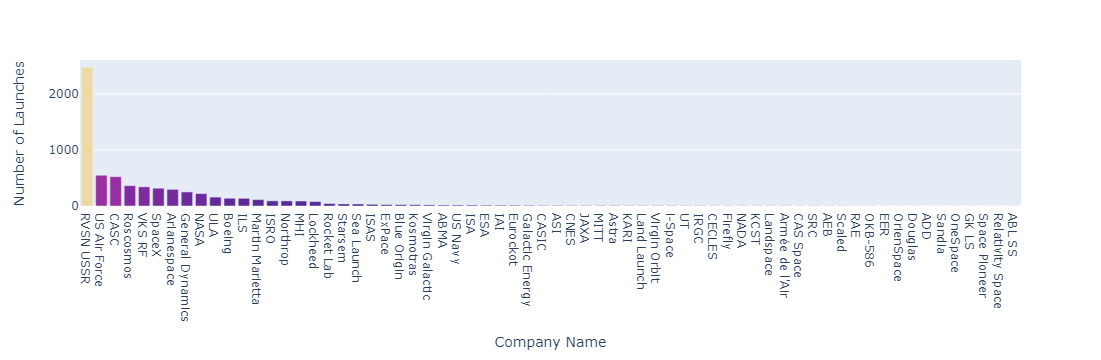

In [50]:
launches_per_company = df_data['Organisation'].value_counts()
fig = px.bar(x=launches_per_company.index, y=launches_per_company.values, 
							hover_name=launches_per_company.index, color=launches_per_company.values, 
							color_continuous_scale='Agsunset')
fig.update_layout(xaxis_title='Company Name', yaxis_title='Number of Launches', 
									coloraxis_showscale=False)
fig.show()

## Number of Active vs Retired Rockets
How many rockets are active compared to those that are decomissioned?

In [51]:
active_rockets = df_data['Rocket_Status'][df_data['Rocket_Status'] == "Active"].count()
retired_rockets = df_data['Rocket_Status'][df_data['Rocket_Status'] == "Retired"].count()
print("Number of Active rockets: ", active_rockets)
print("Number of Active rockets: ", retired_rockets)

Number of Active rockets:  1471
Number of Active rockets:  5240


## Distribution of Mission Status
How many missions were successful? How many missions failed?

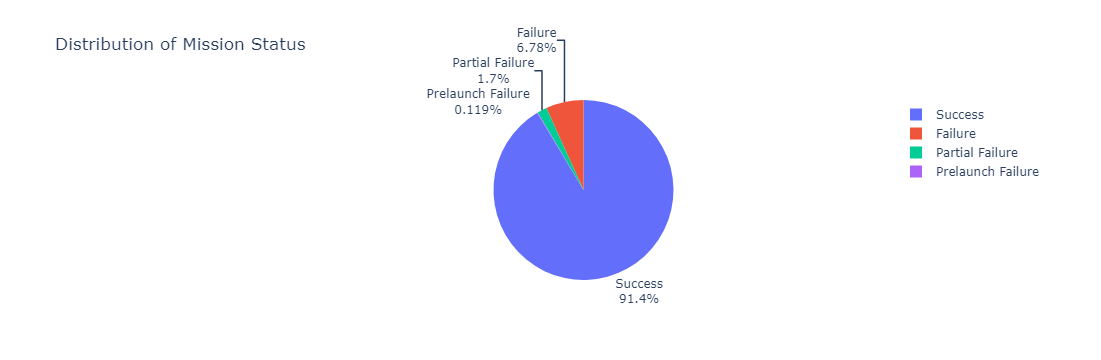

In [52]:
mission_status = df_data['Mission_Status'].value_counts()
fig = px.pie(labels=mission_status.index, values=mission_status.values, title="Distribution of Mission Status", 
names=mission_status.index)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

## How Expensive are the Launches
Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

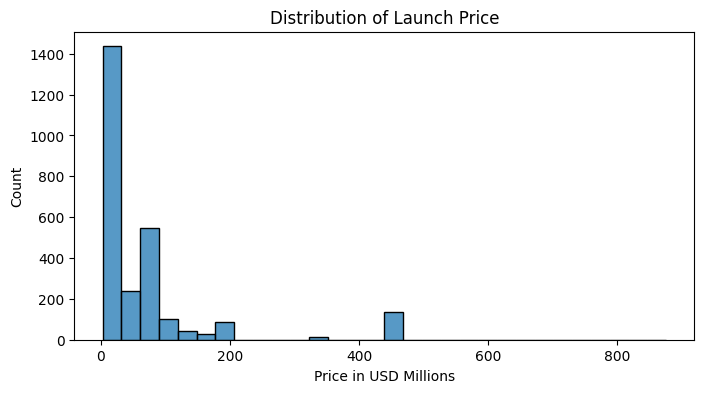

In [55]:
# Create a dataframe with non-zero price values
df_data_nz = df_data[df_data['Price'] > 0]

plt.figure(figsize=(8, 4), dpi=100)
sns.histplot(data=df_data_nz, x="Price", bins=30)
plt.xlabel('Price in USD Millions')
plt.title('Distribution of Launch Price')
plt.show()

## Use a Choropleth Map to Show the Number of Launches by Country

In [59]:
mission_status_per_country = df_data[['Mission_Status', 'Country','ISO']]
launches_by_country = mission_status_per_country.groupby(['ISO', 'Country'], as_index=False).agg({'Mission_Status':pd.Series.count})

In [63]:
launches_by_country.rename(columns={'Mission_Status':'Nr of Launches'}, inplace=True)

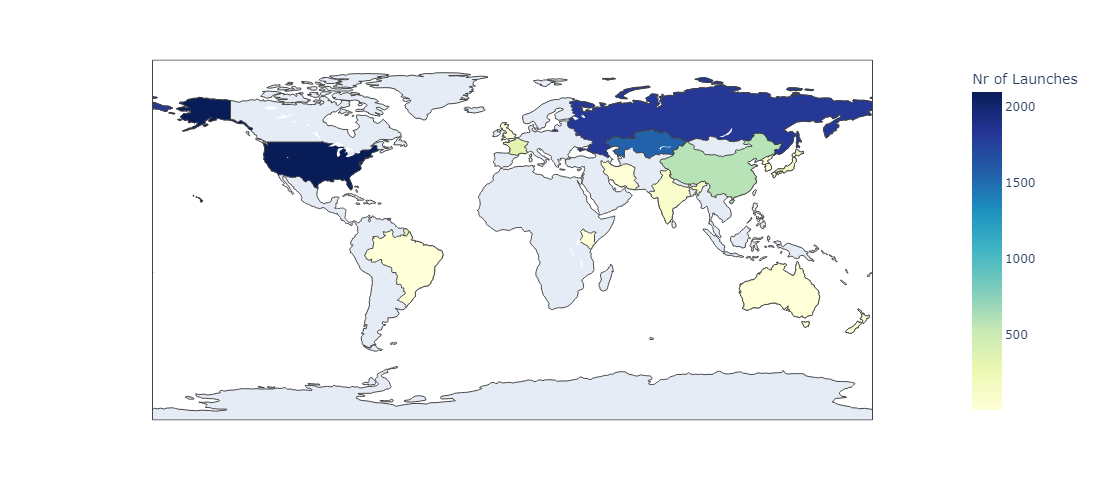

In [87]:
world_map = px.choropleth(launches_by_country, 
						  locations="ISO", 
						  color="Nr of Launches", # column of gapminder 
						  hover_name="Country", # column to add to hover information 
						  color_continuous_scale=px.colors.sequential.YlGnBu)
world_map.update_layout(coloraxis_showscale=True, width=800, height=500) 
world_map.show()

## Use a Choropleth Map to Show the Number of Failures by Country

In [67]:
# Consider Prelaunch and partial failure as well
failure_per_country = mission_status_per_country.loc[(mission_status_per_country['Mission_Status'] == 'Failure') |
                                                     (mission_status_per_country['Mission_Status'] == 'Prelaunch Failure') |
                                                     (mission_status_per_country['Mission_Status'] == 'Partial Failure') ]

In [75]:
failure_count_per_country = failure_per_country.groupby(['ISO', 'Country'], as_index=False).agg({'Mission_Status':pd.Series.count})
failure_count_per_country.rename(columns={'Mission_Status':'Nr of Failures'}, inplace=True)

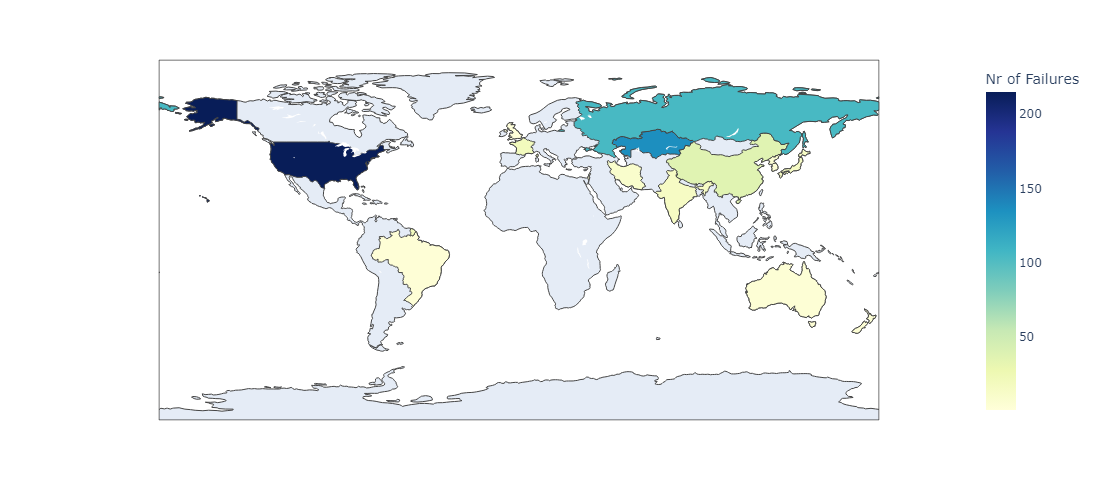

In [86]:
world_map = px.choropleth(failure_count_per_country, 
													locations="ISO", 
													color="Nr of Failures", # column of gapminder 
													hover_name="Country", # column to add to hover information 
													color_continuous_scale=px.colors.sequential.YlGnBu)
world_map.update_layout(coloraxis_showscale=True, width=800, height=500) 
world_map.show()

## Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [81]:
co_org = df_data.groupby(['Country', 'Organisation', 'Mission_Status'], as_index=False).agg({'Details':pd.Series.count})

In [ ]:
fig = px.sunburst(co_org, 
									path=['Country', 'Organisation', 'Mission_Status'], 
									values='Details', 
									title='Mission Status w.r.t Countries & Organization')
fig.update_layout(width=800, height=800)
fig.show()

## Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [95]:
total_cost_per_organisation = df_data[['Organisation', 'Price']].groupby('Organisation', as_index=False).agg({'Price': pd.Series.sum})
total_cost_per_organisation = total_cost_per_organisation.sort_values('Price', ascending=False)

In [103]:
# Extract rows with non-zero Price values 
total_cost_per_organisation = total_cost_per_organisation[total_cost_per_organisation['Price'] > 0]

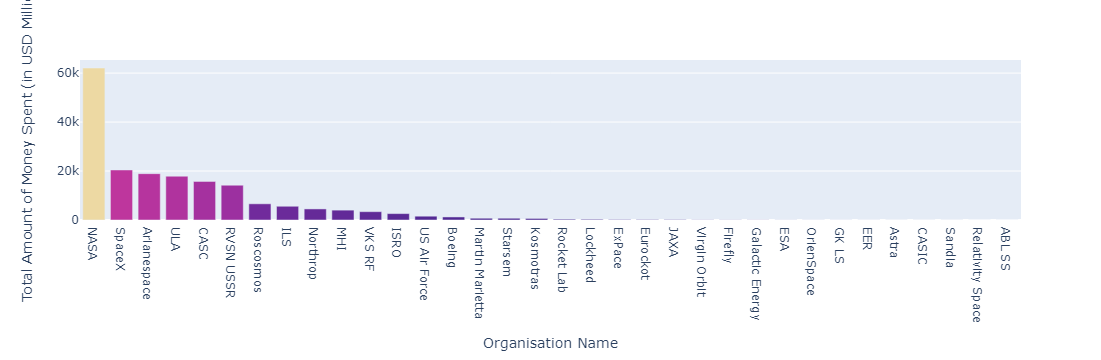

In [123]:
fig = px.bar(x=total_cost_per_organisation['Organisation'], y=total_cost_per_organisation['Price'], 
							hover_name=total_cost_per_organisation['Organisation'], color=total_cost_per_organisation['Price'],
							color_continuous_scale='Agsunset')
fig.update_layout(xaxis_title='Organisation Name', yaxis_title='Total Amount of Money Spent (in USD Million)', 
									coloraxis_showscale=False)
fig.update_traces(hovertemplate='Organisation: %{x} <br>Total Amount: %{y}')
fig.show()

## Analyse the Amount of Money Spent by Organisation per Launch

In [105]:
total_cost_per_launch = df_data[['Organisation', 'Datetime', 'Price']].groupby(['Organisation','Datetime'], as_index=False).agg({'Price': pd.Series.sum})
total_cost_per_launch = total_cost_per_launch.sort_values('Price', ascending=False)

In [106]:
# Extract rows with non-zero Price values 
total_cost_per_launch = total_cost_per_launch[total_cost_per_launch['Price'] > 0]

## Chart the Number of Launches Month-on-Month until the Present

In [116]:
launches_per_month = df_data.groupby(['Month', 'Month_Nr'], as_index=False).agg({'Details': pd.Series.count}).sort_values('Month_Nr')

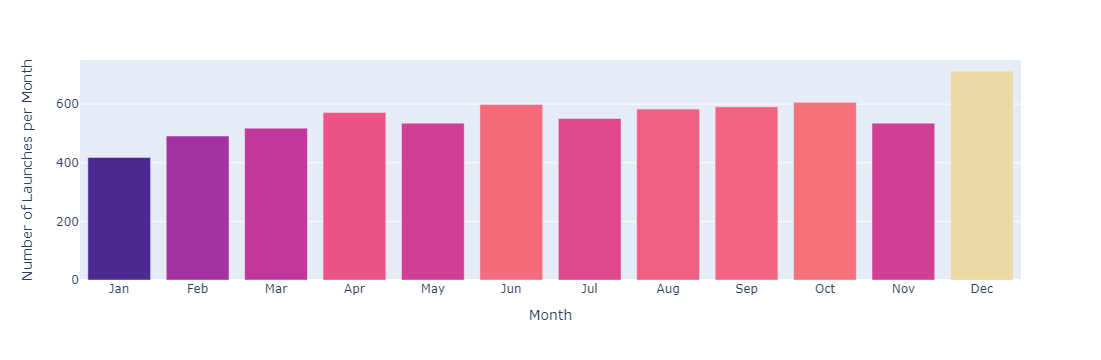

In [122]:
fig = px.bar(x=launches_per_month['Month'], y=launches_per_month['Details'], 
							hover_name=launches_per_month['Month'], color=launches_per_month['Details'],
							color_continuous_scale='Agsunset')
fig.update_layout(xaxis_title='Month', yaxis_title='Number of Launches per Month', 
									coloraxis_showscale=False)
fig.update_traces(hovertemplate='Month: %{x} <br>Nr of Launches: %{y}')
fig.show()

From this chart, we can conclude that month of December is best for space mission. Month of January is least popular for space launches

## How has the Launch Price varied Over Time?
Create a line chart that shows the average price of rocket launches over time.

In [ ]:
df_nonzero_price = df_data[df_data['Price'] != 0]
avg_price = df_nonzero_price.groupby('Year', as_index=False).agg({'Price':pd.Series.mean})
avg_price

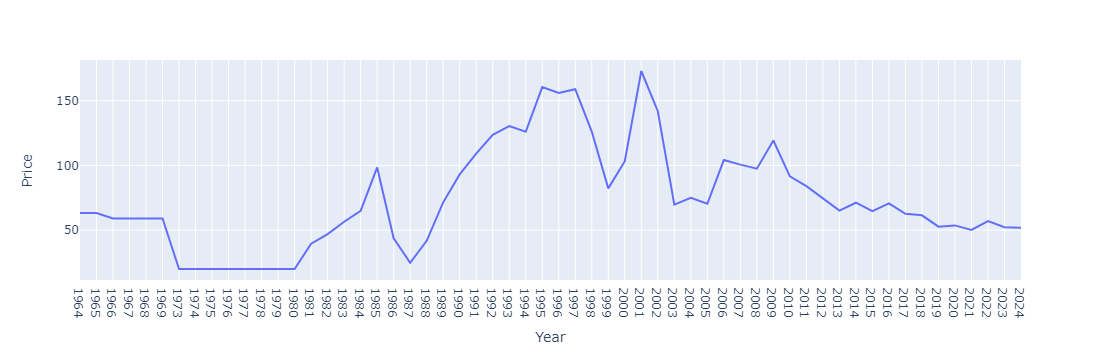

In [125]:
l_chart = px.line(avg_price,
                  x='Year', 
                  y='Price')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Price')
 
l_chart.show()

## Chart the Number of Launches over Time by the Top 10 Organisations.
How has the dominance of launches changed over time between the different players? 

In [193]:
# Get the list of top 10 organisations
top10_org = df_data.groupby(['Organisation'],as_index=False)['Details'].count().sort_values('Details', ascending=False)[:10]

In [194]:
# Construct a data frame with mission details of top 10 organisations only
top10_df = pd.DataFrame()
for org in top10_org['Organisation'].values:
    df = df_data[df_data['Organisation'] == org]
    top10_df = pd.concat([top10_df, df])

In [ ]:
# Verify if dataframe contains top 10 organisations only.
top10_df['Organisation'].unique()

In [186]:
# Top 10 organisations year over year
top10_df_yoy = top10_df.groupby(['Year', 'Organisation'],as_index=False)['Details'].count()

C:\Users\Zeeshan Altaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



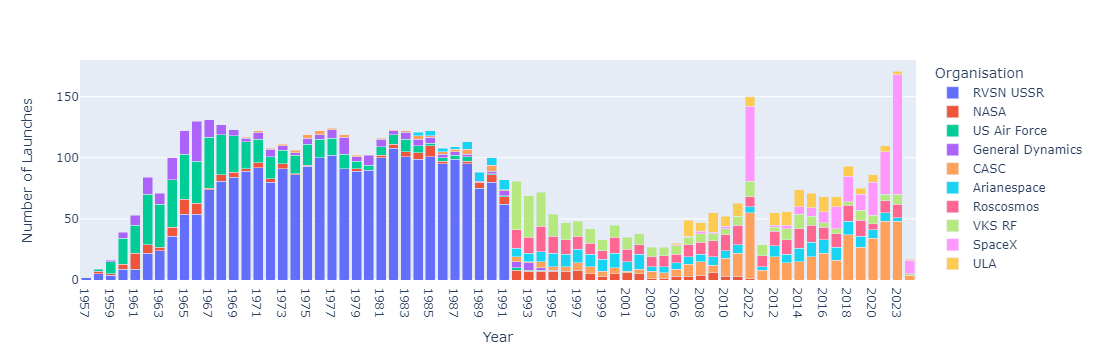

In [192]:
fig = px.bar(top10_df_yoy, x='Year', y='Details', 
							hover_name=top10_df_yoy['Organisation'], color=top10_df_yoy['Organisation'],
							color_continuous_scale='Agsunset', barmode='stack')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Launches', 
									coloraxis_showscale=False)
fig.update_traces(hovertemplate='Year: %{x} <br>Number of Launches: %{y}')
fig.show()

## Create a YoY chart showing the total number of launches per Country

In [285]:
# Total # of launches YoY
total_launches_yoy = df_data.groupby(['Year','Country'], as_index=False).agg({'Mission_Status':pd.Series.count})
total_launches_yoy.rename(columns={'Mission_Status':'Number of Launches'}, inplace=True)

C:\Users\Zeeshan Altaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



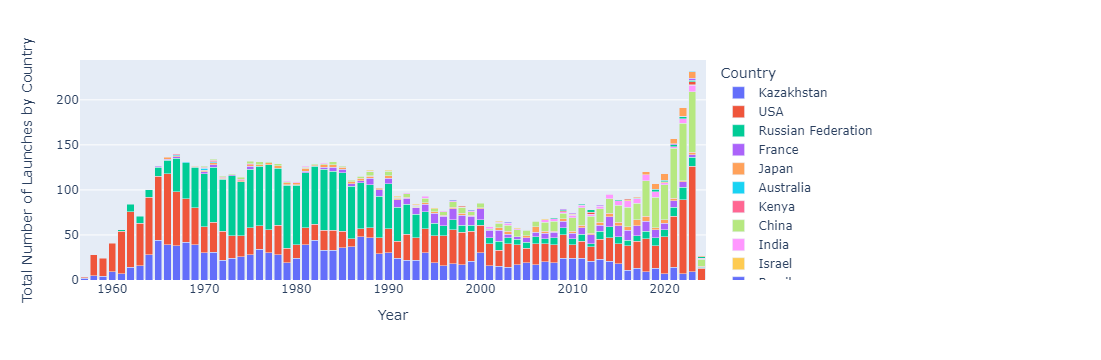

In [286]:
fig = px.bar(all_country_launches, x='Year', y='Number of Launches', 
							hover_name='Year', color='Country', 
							color_continuous_scale='Agsunset', barmode='stack')
fig.update_layout(xaxis_title='Year', yaxis_title='Total Number of Launches by Country', 
									coloraxis_showscale=False)
fig.show()

## For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2024)

In [287]:
# Total # of launches YoY
total_launches_yoy = df_data.groupby(['Year','Country']).agg({'Mission_Status':pd.Series.count})
total_launches_yoy.rename(columns={'Mission_Status':'Number of Launches'}, inplace=True)

In [288]:
# Get the lead organization in terms of most number of launches per year.
y = total_launches_yoy['Number of Launches'].groupby('Year', group_keys=False).nlargest(1)

# As nlargest() returns a Series, so it need to converted back inot a DataFrame. reset_index will convert the multiindex into column
lead_country = pd.DataFrame(y)
lead_country.reset_index(inplace=True)

C:\Users\Zeeshan Altaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



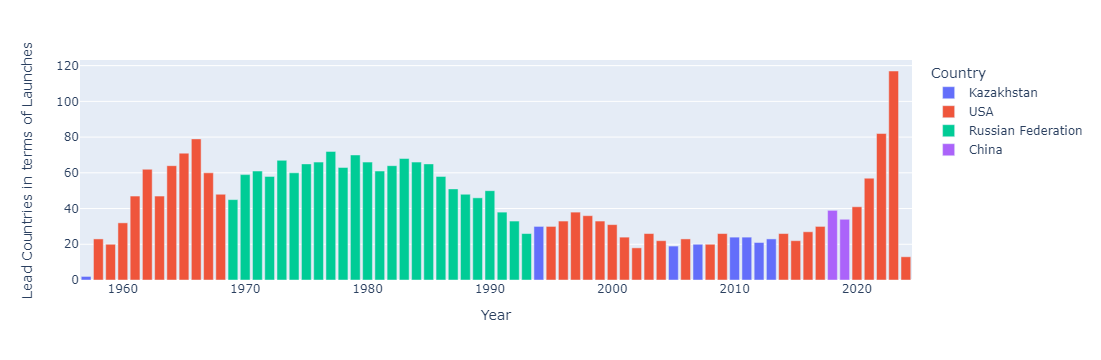

In [289]:
fig = px.bar(lead_country, x='Year', y='Number of Launches', 
							hover_name='Year', color='Country', 
							color_continuous_scale='Agsunset')
fig.update_layout(xaxis_title='Year', yaxis_title='Lead Countries in terms of Launches', 
									coloraxis_showscale=False)
fig.show()

## Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

In [290]:
org_launches_yoy = df_data.groupby(['Year','Organisation']).agg({'Mission_Status':pd.Series.count})
org_launches_yoy.rename(columns={'Mission_Status':'Number of Launches'}, inplace=True)

In [291]:
# Get the lead organization in terms of most number of launches per year.
y = org_launches_yoy['Number of Launches'].groupby('Year', group_keys=False).nlargest(1)

# As nlargest() returns a Series, so it need to converted back inot a DataFrame. reset_index will convert the multiindex into column
lead_org = pd.DataFrame(y)
lead_org.reset_index(inplace=True)

C:\Users\Zeeshan Altaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



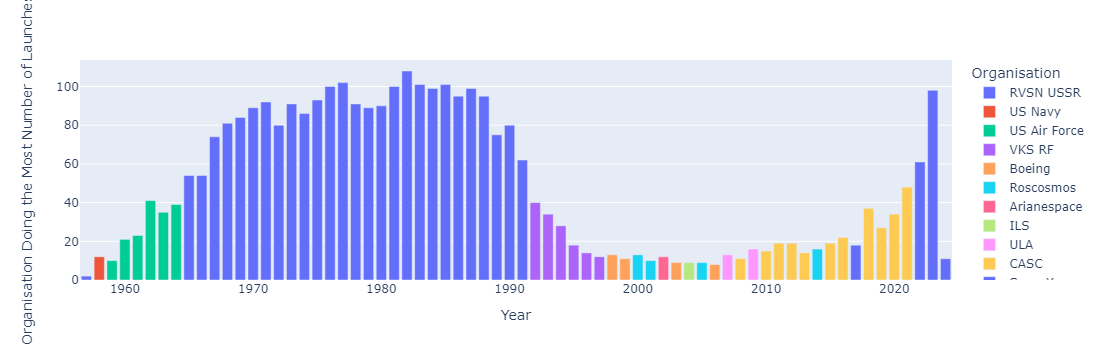

In [292]:
fig = px.bar(lead_org, x='Year', y='Number of Launches', 
							hover_name='Year', color='Organisation', 
							color_continuous_scale='Agsunset')
fig.update_layout(xaxis_title='Year', yaxis_title='Organisation Doing the Most Number of Launches', 
									coloraxis_showscale=False)
fig.show()

## Cold War Space Race: USA vs USSR
The cold war lasted from the start of the dataset up until 1991.

In [195]:
df_data['Year'] = df_data['Year'].apply(pd.to_numeric)

In [196]:
# Create a dataframe having mission details of cold war years only i.e. till 1991
cw_data = df_data[df_data['Year'] < 1992]

In [197]:
# Get the data for cold war countries only i.e. USA and USSR. Note that Kazakhstan was part of USSR during cold war years
cw_ussr_usa = cw_data.loc[(cw_data['Country'] == 'USA') | (cw_data['Country'] == 'Russian Federation') | (cw_data['Country'] == 'Kazakhstan')]

In [ ]:
# Change the name of Russian Federation to what it was during Cold War years i.e. USSR
cw_ussr_usa['Country'].loc[cw_ussr_usa['Country'] == 'Russian Federation'] = 'USSR'

# Kazakhstan was part of USSR during cold war years
cw_ussr_usa['Country'].loc[cw_ussr_usa['Country'] == 'Kazakhstan'] = 'USSR'

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

In [199]:
cw_launches = cw_ussr_usa['Country'].value_counts()

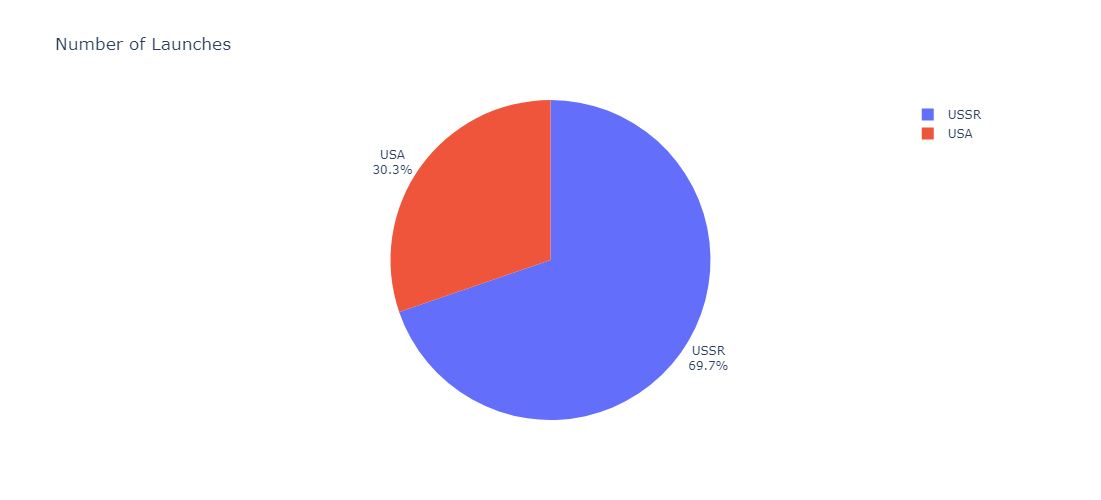

In [224]:
fig = px.pie(labels=cw_launches.index, values=cw_launches.values, title="Number of Launches", 
names=cw_launches.index)
fig.update_layout(width=500, height=500)
fig.update_traces(textposition='outside', textinfo='percent+label', hovertemplate="Country: %{label} <br>Launches: %{percent} </br>")
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [225]:
cw_launches_yoy = cw_ussr_usa.groupby(['Country','Year'], as_index=False).agg({'Details':pd.Series.count})
cw_launches_yoy.rename(columns={'Details': 'Nr of Launches'}, inplace=True)

C:\Users\Zeeshan Altaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



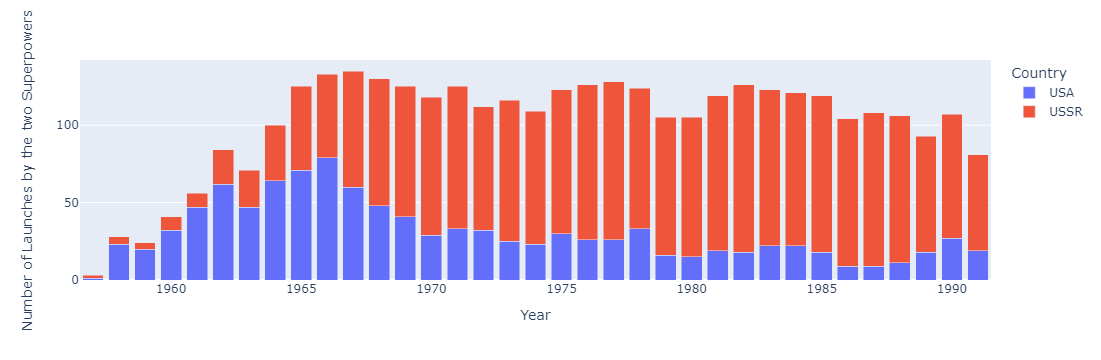

In [229]:
# Stacked Bar Chart
fig = px.bar(cw_launches_yoy, x='Year', y='Nr of Launches', 
							hover_name='Year', color='Country', 
							color_continuous_scale='Agsunset', barmode='stack')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Launches by the two Superpowers', 
									coloraxis_showscale=False)
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [230]:
# Create a dataframe with mission status as failure
cw_failures = cw_ussr_usa.loc[(cw_ussr_usa['Mission_Status'] == 'Failure') | (cw_ussr_usa['Mission_Status'] == 'Partial Failure') | (cw_ussr_usa['Mission_Status'] == 'Prelaunch Failure')]
cw_failures_yoy = cw_failures.groupby(['Country','Year'], as_index=False).agg({'Details':pd.Series.count})
cw_failures_yoy.rename(columns={'Details': 'Nr of Failures'}, inplace=True)

C:\Users\Zeeshan Altaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



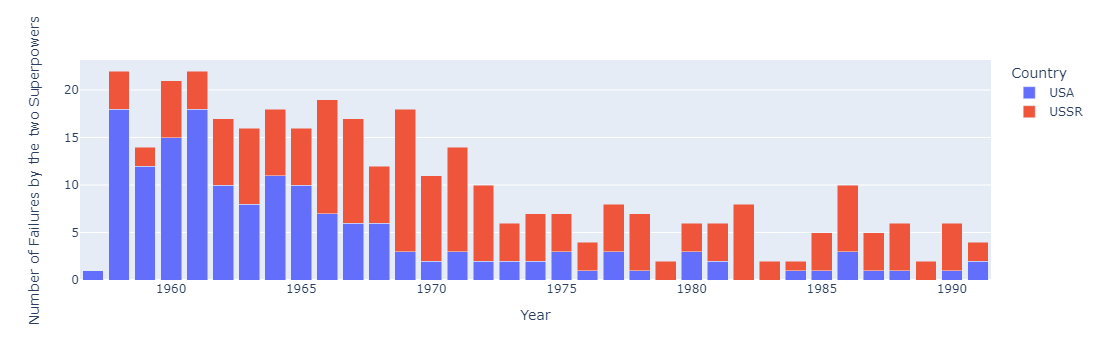

In [231]:
# Stacked Bar Chart
fig = px.bar(cw_failures_yoy, x='Year', y='Nr of Failures', 
							hover_name='Year', color='Country', 
							color_continuous_scale='Agsunset', barmode='stack')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Failures by the two Superpowers', 
									coloraxis_showscale=False)
fig.show()

## Chart the Percentage of Failures over Time

In [237]:
cw_failures_yoy['Failure Perc'] = round(cw_failures_yoy['Nr of Failures']/cw_launches_yoy['Nr of Launches']*100
cw_failures_yoy = cw_failures_yoy.loc[cw_failures_yoy['Failure Perc'] <= 100]

C:\Users\Zeeshan Altaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



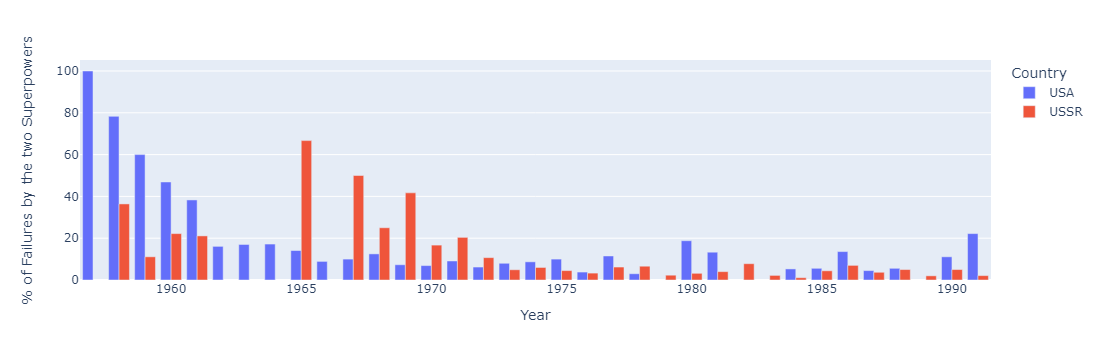

In [293]:
fig = px.bar(cw_failures_yoy, x='Year', y='Failure Perc', 
							hover_name='Year', color='Country', 
							color_continuous_scale='Agsunset', barmode='group')
fig.update_layout(xaxis_title='Year', yaxis_title='% of Failures by the two Superpowers', 
									coloraxis_showscale=False)
fig.show()

In [276]:
# Total # of launches YoY
total_launches_yoy = df_data.groupby(['Year','Country']).agg({'Mission_Status':pd.Series.count})
total_launches_yoy.rename(columns={'Mission_Status':'Number of Launches'}, inplace=True)

In [277]:
# Get the lead country in terms of number of launches for each year.
y = total_launches_yoy['Number of Launches'].groupby('Year', group_keys=False).nlargest(1)

# As nlargest() returns a Series, so it need to converted back inot a DataFrame. reset_index will convert the multiindex into column
lead_country = pd.DataFrame(y)
lead_country.reset_index(inplace=True)

C:\Users\Zeeshan Altaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



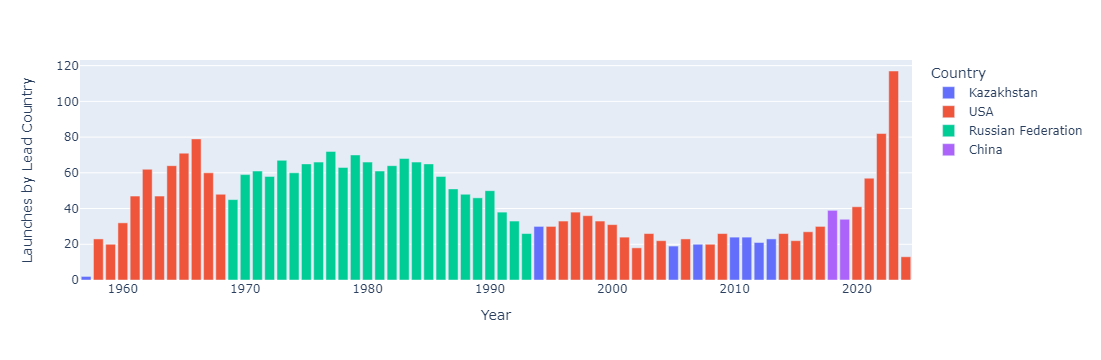

In [278]:
fig = px.bar(lead_country, x='Year', y='Number of Launches', 
							hover_name='Year', color='Country', 
							color_continuous_scale='Agsunset')
fig.update_layout(xaxis_title='Year', yaxis_title='Launches by ', 
									coloraxis_showscale=False)
fig.show()